# Linear regression


#### 1. Load the provided .npy files. You can load it with numpy.
 - each file contains one vector, X and y
 - visualize X vs y on a scatter plot
 - fit an $y = w_0 + w_1\cdot X + w_2 \cdot X^2$ linear regression using sklearn

#### 2. Using different features
 - plot the residuals (the difference between the prediction and the actual $y$) vs the original $y$
 - a non-random-noise like pattern suggests non-linear connection between the features and the predictions
 - someone told us that the connection between X and y is $y = A \cdot X + B \cdot \cos^3(X) + C\cdot X^2 + D$
    - using sklearn's linear regression estimate $A, B, C, D$!
 - plot the residuals again! is it better now?

#### 3. Other methdods than sklearn for linear regression
 - using the statsmodels package perform the same linear regression as in 2.) (hint: use statsmodels.api.OLS)
 - is the result the same? if not guess, why? (did you not forget to add the constant term?)
 - try to get the same results with statsmodels as with sklearn!
 - using the analytic solution formula shown during the lecture, calculate the coefficients (A, B, C, D). are they the same compared to the two previous methods?

#### 4. 
 - load the real_estate.csv to a pandas dataframe
 - drop the ID column and the geographic location columns
 - fit a linear regression model to predict the unit price using sklearn

#### 5. 
 - interpret the coefficients and their meaning shortly with your own words
 - plot the residuals for the predictions. if you had to decide only on this information, which house would you buy?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

# Preps

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import datetime

# Task 1

Text(0, 0.5, 'The values in y.npy')

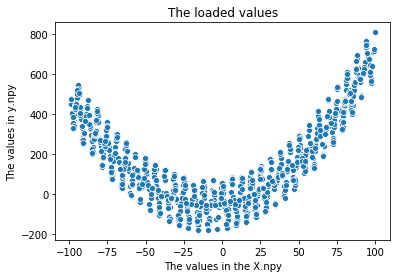

In [2]:
"""
Loadimg the given x and y values
"""
x = np.load('X.npy')
y = np.load('y.npy')
ax = sns.scatterplot(x = x,y=y)
ax.set_title("The loaded values")
ax.set_xlabel("The values in the X.npy")
ax.set_ylabel("The values in y.npy")

# Task 2

In [3]:
def res_plot(residual,original):
    """
    This function will create a residual plot
    original parameter is for the oroginal values
    residual is for the residuals
    """
    ax = sns.scatterplot(y = residual,x = original,alpha=0.3)
    ax.set_title("Residual plot")
    ax.set_xlabel("Original values")
    ax.set_ylabel("Residuals")

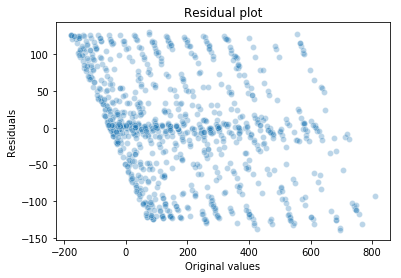

In [4]:
"""
The sklearn LinearRegression function need specific inputs
It takes specific arrays to fit
If we want to fit a polinom, every element of it must be placed in different arrays
This is what I'm doing in the first line, then I creat an object with this function, then fit and plot it
"""

x_1 = np.column_stack((x,x**2))
reg = LinearRegression()
reg.fit(x_1,y)
res_plot(reg.predict(x_1)-y,y)
# sns.scatterplot(y =  reg.predict(x_1)-y,x = y,alpha=0.3)

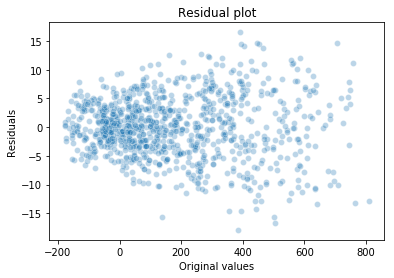

In [5]:
"""
The same as 1 cell before, but now I use an other polinom to fit 
"""
pol = lambda x: (x,np.cos(x)**3,x**2)

x_2 = np.column_stack(pol(x))
reg_2=LinearRegression()
reg_2.fit(x_2,y)
res_plot(reg_2.predict(x_2)-y,y)
#sns.scatterplot(y = reg_2.predict(x_2)-y,x = x,alpha=0.3)

# Task 3

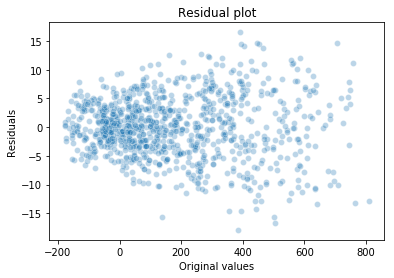

In [6]:
"""
statsmodels OLS require specific data structure to fit
Every column has different value of x, like in the previous task
I could reuse the x_2 varriable, but this task isn't about memory efficiency so I'd like to separate the values used by different tasks
"""

x_3 = np.column_stack(pol(x))
# Do not forget about adding a constant
x_3 = sm.add_constant(x_3)
model = sm.OLS(y,x_3)
results = model.fit()
# Calculating manually the coeffitients
omega = np.linalg.multi_dot((np.linalg.inv((np.dot(x_3.transpose(),x_3))),x_3.transpose(),y))


res_plot(results.predict()-y,y)

In [7]:
def check_coffs(res_1,res_2,err_limit = 0.000000001):
    """
    This function takes two arrays, containing the values of coefficients in the same order (A,B,C,D)
    """
    err = lambda string:print("There is a big difference in the "+string+" coefficient")
    check = lambda v1,v2 : abs(v1-v2)
    dic = {0:"D",1:"A",2:"B",3:"C"}
    diff_found = False
    for index,elems in enumerate(zip(res_1,res_2)):
        if( check(elems[0],elems[1]) >= err_limit):
            err(dic[index])
            diff_found = True
    if(not diff_found):
        print("Every value were similar, or in between the error limit")

In [8]:
check_coffs(results.params,omega)

Every value were similar, or in between the error limit


In [9]:
"""
If the check function is not satisfying, uncomment the following two lines
"""
#print(results.params)
#print(omega)

'\nIf the check function is not satisfying, uncomment the following two lines\n'

# Task 4

In [10]:
"""
Reading the lines into pandas DataFrame, droping the given columns by the drop function
Creating the x and y axis as an numpy array just because it's easier to index
"""
df = pd.read_csv("real_estate.csv")
df.drop(["No","X5 latitude","X6 longitude"],axis = 1, inplace = True)
# Creating x and y
x_4 = df.to_numpy()[:,:4]
X_4 = x_4[:,:]
y_4 = df["Y house price of unit area"]
# Fitting:
reg_4=LinearRegression()
reg_4.fit(x_4,y_4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
"""
It is not necessarry, I just wanted to rename them like this
"""
cols = df.columns
df.rename(columns = {cols[0]:"transaction date",cols[1]:"house age",cols[2]:"distance to the nearest MRT station",cols[3]:"number of convinience stores"},inplace = True)

# Task 5

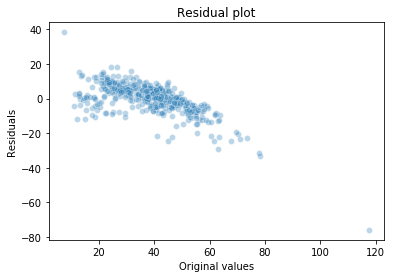

In [12]:
# Plotting the residuals
res_plot(reg_4.predict(x_4)-y_4,y_4)

In [13]:
"""
The house I'd buy is the house wich has the highest residual value.
This means I can sell this house for the highest price
From the plot it is easy to see, that this house has the lowest price either
"""
max(reg_4.predict(x_4)-y_4)

38.38935084513323

In [14]:
"""
These are the results of the fitting
The transaction date is not in date format,it could be changed
"""

for coef,name in zip(reg_4.coef_,df.columns[:4]):
    print("The bias of " + str(name) + " is "+str(np.round(coef,3)))

The bias of transaction date is 5.778
The bias of house age is -0.254
The bias of distance to the nearest MRT station is -0.006
The bias of number of convinience stores is 1.258


The transaction date has the greatest bias, wich makes sense, cause the values of the houses could change time to time.  
The second greatest is the number of convience store, it is also makes sense, 'cause everybody likes convience.  
The distance of the nearest MRT station is a negative value of course, the further the stores are the less you want to buy the house, because nobody want's to live in separation. It's also a little number $10^{-3}$, 'cause the distance value could be really big (I guess it is measured in meters).  
The house age is a negative factor, the older the house the more dangeourus it will be.
